In [ ]:
#IMPORTING THE REQUIRED LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import metrics, linear_model
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from scipy.optimize import curve_fit
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#reading the input dataset
df = pd.read_csv('/content/drive/MyDrive/Jan22_to_Aug23.csv')

In [ ]:
#checking the first few rows of the dataset
df.head()

,YEAR,MONTH,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,...,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,2022,1.0,1/1/2022 12:00:00 AM,9E,9E,4628.0,DTW,RDU,930.0,925.0,...,0.0,113.0,89.0,74.0,501.0,NaN,NaN,NaN,NaN,NaN
1,2022,1.0,1/1/2022 12:00:00 AM,9E,9E,4632.0,ATL,HPN,1620.0,1700.0,...,0.0,127.0,116.0,105.0,780.0,0.0,29.0,0.0,0.0,0.0
2,2022,1.0,1/1/2022 12:00:00 AM,9E,9E,4633.0,HPN,ATL,1913.0,1939.0,...,0.0,149.0,144.0,121.0,780.0,0.0,0.0,0.0,0.0,21.0
3,2022,1.0,1/1/2022 12:00:00 AM,9E,9E,4634.0,JFK,MSP,1220.0,1213.0,...,0.0,177.0,194.0,172.0,1029.0,NaN,NaN,NaN,NaN,NaN
4,2022,1.0,1/1/2022 12:00:00 AM,9E,9E,4635.0,VPS,ATL,630.0,625.0,...,0.0,73.0,61.0,45.0,250.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
#checking the dimensions of the dataset
print('Number of rows and columns in the dataset:', df.shape)

Number of rows and columns in the dataset: (7069408, 34)


In [ ]:
#checking the datatypes of all the columns in the dataset
print(df.dtypes)

YEAR                     int64
MONTH                  float64
FL_DATE                 object
OP_UNIQUE_CARRIER       object
OP_CARRIER              object
OP_CARRIER_FL_NUM      float64
ORIGIN                  object
DEST                    object
CRS_DEP_TIME           float64
DEP_TIME               float64
DEP_DELAY              float64
DEP_DELAY_NEW          float64
DEP_DEL15              float64
TAXI_OUT               float64
WHEELS_OFF             float64
WHEELS_ON              float64
TAXI_IN                float64
CRS_ARR_TIME           float64
ARR_TIME               float64
ARR_DELAY              float64
ARR_DELAY_NEW          float64
ARR_DEL15              float64
CANCELLED              float64
CANCELLATION_CODE       object
DIVERTED               float64
CRS_ELAPSED_TIME       float64
ACTUAL_ELAPSED_TIME    float64
AIR_TIME               float64
DISTANCE               float64
CARRIER_DELAY          float64
WEATHER_DELAY          float64
NAS_DELAY              float64
SECURITY

In [ ]:
#count of null values in all the columns of the dataset
print(df.isnull().sum())

YEAR                         0
MONTH                        1
FL_DATE                      1
OP_UNIQUE_CARRIER            3
OP_CARRIER                   3
OP_CARRIER_FL_NUM            3
ORIGIN                       3
DEST                         3
CRS_DEP_TIME                 3
DEP_TIME                139429
DEP_DELAY               139497
DEP_DELAY_NEW           139497
DEP_DEL15               139498
TAXI_OUT                142676
WHEELS_OFF              142677
WHEELS_ON               145292
TAXI_IN                 145292
CRS_ARR_TIME                 6
ARR_TIME                145290
ARR_DELAY               160474
ARR_DELAY_NEW           160474
ARR_DEL15               160475
CANCELLED                   10
CANCELLATION_CODE      6925951
DIVERTED                    12
CRS_ELAPSED_TIME            15
ACTUAL_ELAPSED_TIME     160480
AIR_TIME                160481
DISTANCE                    15
CARRIER_DELAY          5577290
WEATHER_DELAY          5577290
NAS_DELAY              5577290
SECURITY

In [ ]:
#Outliers and the result is NULL

import numpy as np
from scipy import stats

# Assuming your DataFrame is named 'df'
# Calculate the Z-scores for each numeric column
z_scores = np.abs(stats.zscore(df.select_dtypes(include='number')))

# Define a threshold for identifying outliers (e.g., Z-score > 3)
threshold = 3

# Find the indices of outliers
outlier_indices = np.where(z_scores > threshold)

# Display the indices of outliers
print("Outlier indices:", outlier_indices)

# Remove outliers from the DataFrame (optional)
# df_no_outliers = df[(z_scores < threshold).all(axis=1)]

# Display the rows with outliers (optional)
# df_outliers = df.iloc[outlier_indices[0]]
# print("Rows with outliers:\n", df_outliers)


Outlier indices: (array([], dtype=int64), array([], dtype=int64))


<ipython-input-8-9493f7e02ce9>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, annot_kws={"size": 4});


,YEAR,MONTH,OP_CARRIER_FL_NUM,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,TAXI_OUT,WHEELS_OFF,...,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
YEAR,1.000000,-0.302567,-0.043879,0.004750,0.003106,0.016841,0.017444,0.017669,0.028886,0.002472,...,0.003695,0.019927,0.022048,0.017203,0.015994,-0.010671,0.002771,0.026770,0.001938,0.029303
MONTH,-0.302567,1.000000,-0.011250,0.001742,-0.000701,-0.006204,-0.007356,-0.006707,-0.009203,-0.001180,...,-0.000848,-0.018995,-0.017394,-0.016639,-0.007261,-0.007965,-0.000754,-0.013801,-0.000939,0.000497
OP_CARRIER_FL_NUM,-0.043879,-0.011250,1.000000,-0.004059,-0.001981,-0.032065,-0.024437,-0.066939,0.095365,0.008277,...,0.001114,-0.326007,-0.323766,-0.345668,-0.361223,0.026957,0.046356,-0.011663,-0.006440,-0.008665
CRS_DEP_TIME,0.004750,0.001742,-0.004059,1.000000,0.944322,0.101484,0.095483,0.188758,0.006399,0.911282,...,0.001194,-0.011765,-0.008450,-0.007609,-0.001955,-0.055219,-0.001658,-0.053001,-0.005599,0.097998
DEP_TIME,0.003106,-0.000701,-0.001981,0.944322,1.000000,0.120280,0.112688,0.230069,0.015271,0.964746,...,0.003189,-0.018573,-0.014193,-0.014908,-0.011649,-0.068828,-0.013551,-0.039954,-0.004711,0.103970
DEP_DELAY,0.016841,-0.006204,-0.032065,0.101484,0.120280,1.000000,0.997992,0.535768,0.041872,0.110910,...,0.016255,0.029167,0.032995,0.027378,0.028302,0.708934,0.253876,0.090716,0.017658,0.540366
DEP_DELAY_NEW,0.017444,-0.007356,-0.024437,0.095483,0.112688,0.997992,1.000000,0.516701,0.041226,0.103554,...,0.015799,0.025118,0.029005,0.023001,0.023585,0.709671,0.254109,0.092698,0.017537,0.540016
DEP_DEL15,0.017669,-0.006707,-0.066939,0.188758,0.230069,0.535768,0.516701,1.000000,0.041852,0.220722,...,0.016949,0.035149,0.039622,0.036083,0.038624,0.143207,0.053699,-0.163286,0.016211,0.218097
TAXI_OUT,0.028886,-0.009203,0.095365,0.006399,0.015271,0.041872,0.041226,0.041852,1.000000,0.039302,...,0.013108,0.096259,0.199593,0.071861,0.056295,-0.039987,0.035915,0.308386,-0.007459,-0.092535
WHEELS_OFF,0.002472,-0.001180,0.008277,0.911282,0.964746,0.110910,0.103554,0.220722,0.039302,1.000000,...,0.003533,-0.029280,-0.022062,-0.026246,-0.026394,-0.073746,-0.013717,-0.024940,-0.004735,0.084602


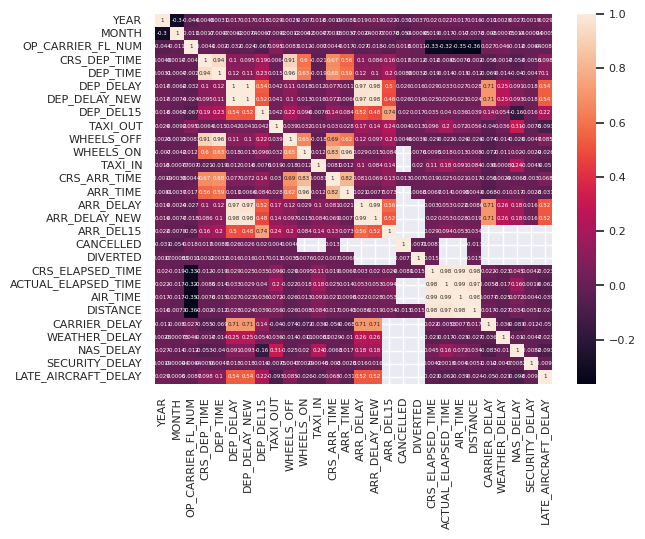

In [ ]:
# Calculate the Pearson Correlation Coefficient (PCC)
correlations = df.corr(numeric_only=True)
sns.set(rc={'xtick.labelsize': 8, 'ytick.labelsize': 8})
sns.heatmap(df.corr(), annot=True, annot_kws={"size": 4});
correlations

In [ ]:
#Including t-test and p-values

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Assuming df and month_mapping are already defined

# Group by Year and Month, then calculate the percentage of delayed flights for each group
result = df.groupby(['YEAR', 'MONTH'])['ARR_DEL15'].sum() / df.groupby(['YEAR', 'MONTH'])['ARR_DEL15'].count() * 100

# Reset index to make it easier to plot
result = result.reset_index()

# Map month numbers to abbreviations
result['MONTH'] = result.apply(lambda row: month_mapping.get((row['YEAR'], row['MONTH']), ""), axis=1)

# Create two datasets for the years 2022 and 2023
df_2022 = result[result['YEAR'] == 2022].copy()
df_2023 = result[result['YEAR'] == 2023].copy()


# Perform t-test
t_stat, p_value = ttest_ind(df_2022['ARR_DEL15'], df_2023['ARR_DEL15'])

# Display the results of the t-test
print(f'T-test results: t_stat={t_stat}, p_value={p_value}')

# Interpretation of the t-test results
if p_value < 0.05:
    print("The difference in the percentage of delayed flights between 2022 and 2023 is statistically significant.")
else:
    print("There is no significant difference in the percentage of delayed flights between 2022 and 2023.")


T-test results: t_stat=0.9907364865311713, p_value=0.333093316598865
There is no significant difference in the percentage of delayed flights between 2022 and 2023.


DELAY ANALYSIS

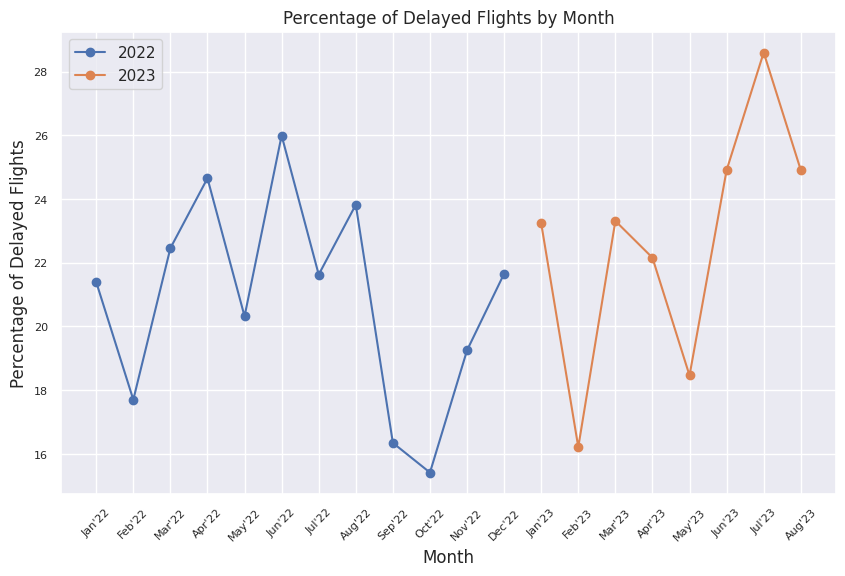

In [ ]:
#MONTHWISE PERCENTAGE OF DELAYED FLIGHTS

month_mapping = {
    (2022, 1.0): "Jan'22",
    (2022, 2.0): "Feb'22",
    (2022, 3.0): "Mar'22",
    (2022, 4.0): "Apr'22",
    (2022, 5.0): "May'22",
    (2022, 6.0): "Jun'22",
    (2022, 7.0): "Jul'22",
    (2022, 8.0): "Aug'22",
    (2022, 9.0): "Sep'22",
    (2022, 10.0): "Oct'22",
    (2022, 11.0): "Nov'22",
    (2022, 12.0): "Dec'22",
    (2023, 1.0): "Jan'23",
    (2023, 2.0): "Feb'23",
    (2023, 3.0): "Mar'23",
    (2023, 4.0): "Apr'23",
    (2023, 5.0): "May'23",
    (2023, 6.0): "Jun'23",
    (2023, 7.0): "Jul'23",
    (2023, 8.0): "Aug'23"

}

# Group by Year and Month, then calculate the percentage of delayed flights for each group
result = df.groupby(['YEAR', 'MONTH'])['ARR_DEL15'].sum() / df.groupby(['YEAR', 'MONTH'])['ARR_DEL15'].count() * 100

# Reset index to make it easier to plot
result = result.reset_index()

# Map month numbers to abbreviations
result['MONTH'] = result.apply(lambda row: month_mapping.get((row['YEAR'], row['MONTH']), ""), axis=1)

# Plotting the line graph
plt.figure(figsize=(10, 6))
colors = np.where(result['YEAR'] == 2023, 'green', 'red')
for year in result['YEAR'].unique():
    subset = result[result['YEAR'] == year]
    plt.plot(subset['MONTH'], subset['ARR_DEL15'], label=str(year), marker='o')

plt.xlabel('Month')
plt.ylabel('Percentage of Delayed Flights')
plt.title('Percentage of Delayed Flights by Month')
plt.legend()
plt.xticks(rotation=45)
plt.show()


In [ ]:
#Comparison of Average delay percentages from January to August
filtered_result = result[result['MONTH'].isin(["Jan'22", "Feb'22", "Mar'22", "Apr'22", "May'22", "Jun'22", "Jul'22", "Aug'22", "Jan'23", "Feb'23", "Mar'23", "Apr'23", "May'23", "Jun'23", "Jul'23", "Aug'23"])]

# Calculate the average value for each year
average_by_year = filtered_result.groupby('YEAR')['ARR_DEL15'].mean()

# Print the average values
print("Average Delay Percentage for each year from January to August:")
print(average_by_year)

Average Delay Percentage for each year from January to August:
YEAR
2022    22.242888
2023    22.721718
Name: ARR_DEL15, dtype: float64


In [ ]:
data = df.copy()

In [ ]:
col = ['OP_CARRIER', 'CRS_DEP_TIME', 'DEP_DELAY_NEW', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_DELAY_NEW', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'AIR_TIME']
data = data.drop(col, axis = 1)

In [ ]:
columns_to_fill = ['CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']
data[columns_to_fill] = data[columns_to_fill].fillna(0)

data.isna().sum()

YEAR                         0
MONTH                        1
FL_DATE                      1
OP_UNIQUE_CARRIER            3
OP_CARRIER_FL_NUM            3
ORIGIN                       3
DEST                         3
DEP_TIME                139429
DEP_DELAY               139497
DEP_DEL15               139498
ARR_TIME                145290
ARR_DELAY               160474
ARR_DEL15               160475
CANCELLED                   10
CANCELLATION_CODE      6925951
DIVERTED                    12
DISTANCE                    15
CARRIER_DELAY                0
WEATHER_DELAY                0
NAS_DELAY                    0
SECURITY_DELAY               0
LATE_AIRCRAFT_DELAY          0
dtype: int64

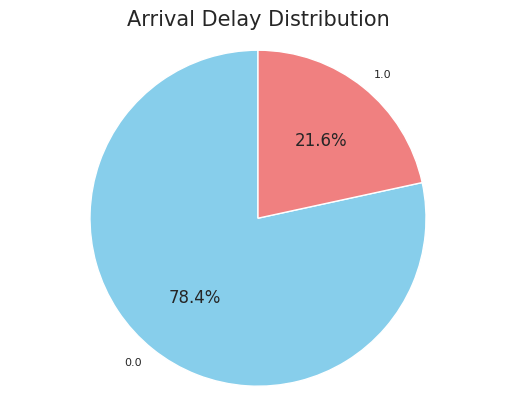

0.0    5416815
1.0    1492118
Name: ARR_DEL15, dtype: int64


In [ ]:
#DELAY DISTRIBUTION
colors = ["skyblue", "lightcoral"]
arr_delay_counts = data["ARR_DEL15"].value_counts()

plt.pie(arr_delay_counts, labels=arr_delay_counts.index, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title("Arrival Delay Distribution", fontsize=15)
plt.axis('equal')
plt.show()

print(arr_delay_counts)


In [ ]:
# Rename airline codes to company names
# Source: https://en.wikipedia.org/wiki/List_of_airlines_of_the_United_States

data['OP_UNIQUE_CARRIER'].replace({
    'UA':'United Airlines',
    'AS':'Alaska Airlines',
    '9E':'Endeavor Air',
    'B6':'JetBlue Airways',
    'EV':'ExpressJet',
    'F9':'Frontier Airlines',
    'G4':'Allegiant Air',
    'HA':'Hawaiian Airlines',
    'MQ':'Envoy Air',
    'NK':'Spirit Airlines',
    'OH':'PSA Airlines',
    'OO':'SkyWest Airlines',
    'VX':'Virgin America',
    'WN':'Southwest Airlines',
    'YV':'Mesa Airline',
    'YX':'Republic Airways',
    'AA':'American Airlines',
    'DL':'Delta Airlines',
    'QX':'Horizon Air'
},inplace=True)


<ipython-input-16-bab8ebe830e2>:7: FutureWarning: The operation <function mean at 0x7c63a1f3c670> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.
  group = data.groupby([pred], as_index=False).aggregate(np.mean)[[pred, 'ARR_DEL15']]


<Figure size 1500x500 with 0 Axes>

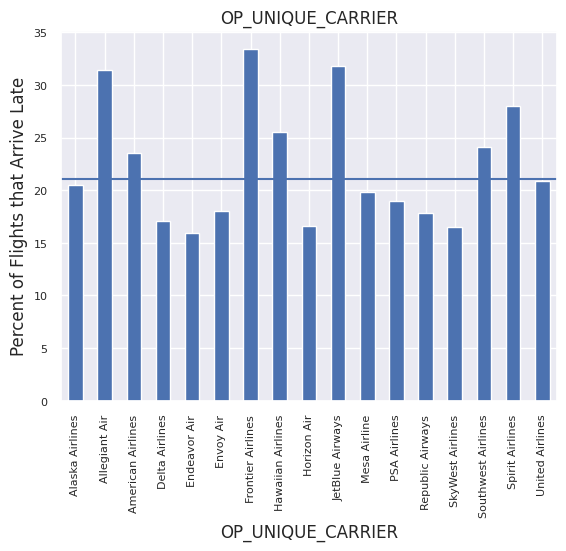

In [ ]:
# Proportion of late flights per category

avgLate = np.sum(data['ARR_DEL15'])/len(data['ARR_DEL15'])
attributes = ['OP_UNIQUE_CARRIER']
for i, pred in enumerate(attributes):
    plt.figure(i, figsize=(15, 5))
    group = data.groupby([pred], as_index=False).aggregate(np.mean)[[pred, 'ARR_DEL15']]
    group.sort_values(by=pred, inplace=True)

    # Convert the ARR_DEL15 column to percentage
    group['ARR_DEL15'] *= 100

    group.plot.bar(x=pred, y='ARR_DEL15')
    plt.axhline(y=avgLate * 100, label='Average')
    plt.ylabel('Percent of Flights that Arrive Late')
    plt.title(pred)
    plt.legend().remove()


In [ ]:
cols_to_keep = ["ARR_DEL15",
                "CARRIER_DELAY",
                "WEATHER_DELAY",
                "NAS_DELAY",
                "SECURITY_DELAY",
                "LATE_AIRCRAFT_DELAY"]
delay_reason_data = data[cols_to_keep].copy()
print(delay_reason_data.isnull().sum())
print(delay_reason_data.shape)

ARR_DEL15              160475
CARRIER_DELAY               0
WEATHER_DELAY               0
NAS_DELAY                   0
SECURITY_DELAY              0
LATE_AIRCRAFT_DELAY         0
dtype: int64
(7069408, 6)


In [ ]:
delay_reason_data = delay_reason_data.dropna(subset=['ARR_DEL15'])
print(delay_reason_data.shape)
frequency_table = delay_reason_data['ARR_DEL15'].value_counts()
print(frequency_table)

(6908933, 6)
0.0    5416815
1.0    1492118
Name: ARR_DEL15, dtype: int64


CARRIER_DELAY Delay Result: 59.16%
WEATHER_DELAY Delay Result: 5.31%
SECURITY_DELAY Delay Result: 0.55%
NAS_DELAY Delay Result: 46.39%
LATE_AIRCRAFT_DELAY Delay Result: 50.33%


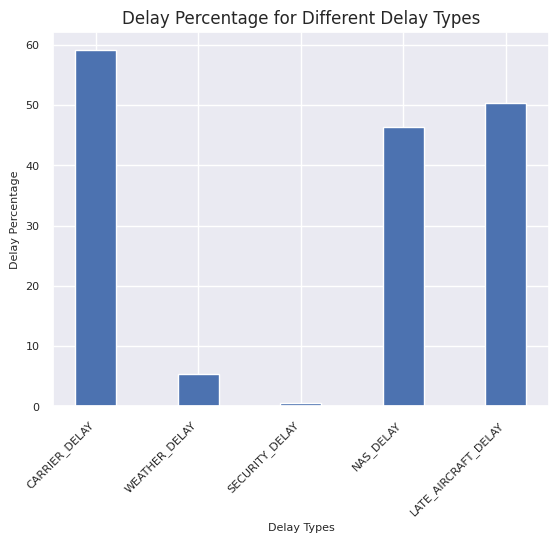

In [ ]:
#Percentage of each delay type
delay_types = ['CARRIER_DELAY', 'WEATHER_DELAY', 'SECURITY_DELAY', 'NAS_DELAY', 'LATE_AIRCRAFT_DELAY']
results = {}

for delay_type in delay_types:
    numerator = delay_reason_data[(delay_reason_data[delay_type] > 0) & (delay_reason_data['ARR_DEL15'] == 1)].shape[0]
    denominator = delay_reason_data[delay_reason_data['ARR_DEL15'] == 1].shape[0]

    result = numerator*100 / denominator if denominator != 0 else 0
    results[delay_type] = result

    print(f"{delay_type} Delay Result: {result:.2f}%")

# Plotting the results
bar_width = 0.4
plt.bar(results.keys(), results.values(), width=bar_width)
plt.xlabel('Delay Types', fontsize=8)
plt.ylabel('Delay Percentage', fontsize=8)
plt.title('Delay Percentage for Different Delay Types',fontsize=12)

# Adjusting distance between bars
plt.xticks(rotation=45, ha='right',fontsize=8)
plt.subplots_adjust(bottom=0.1)

plt.show()


CANCELLATION ANALYSIS

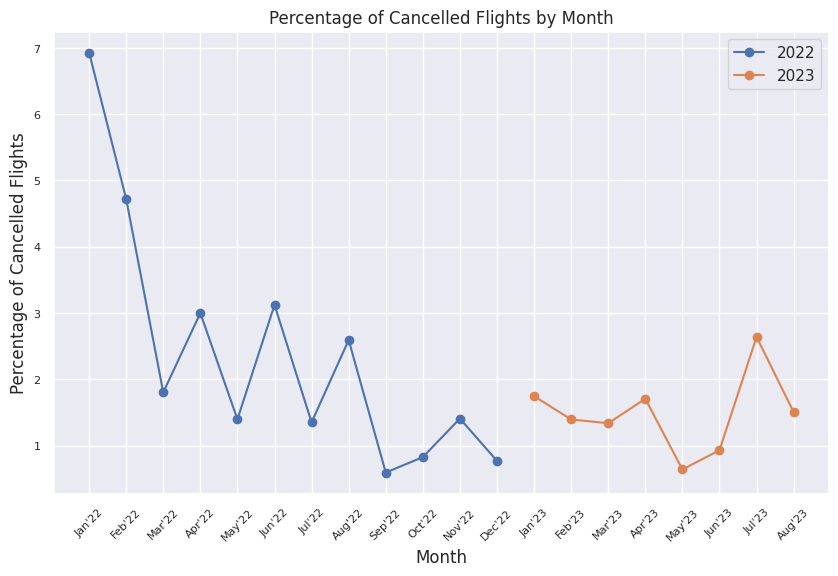

In [ ]:
# Group by Year and Month, then calculate the percentage of cancelled flights for each group
cancelled_result = df.groupby(['YEAR', 'MONTH'])['CANCELLED'].sum() / df.groupby(['YEAR', 'MONTH'])['CANCELLED'].count() * 100

# Reset index to make it easier to plot
cancelled_result = cancelled_result.reset_index()

# Map month numbers to abbreviations
cancelled_result['MONTH'] = cancelled_result.apply(lambda row: month_mapping.get((row['YEAR'], row['MONTH']), ""), axis=1)

# Plotting the line graph for cancelled flights
plt.figure(figsize=(10, 6))
colors_cancelled = np.where(cancelled_result['YEAR'] == 2023, 'green', 'red')
for year in cancelled_result['YEAR'].unique():
    subset_cancelled = cancelled_result[cancelled_result['YEAR'] == year]
    plt.plot(subset_cancelled['MONTH'], subset_cancelled['CANCELLED'], label=str(year), marker='o')

plt.xlabel('Month')
plt.ylabel('Percentage of Cancelled Flights')
plt.title('Percentage of Cancelled Flights by Month')
plt.legend()
plt.xticks(rotation=45)
plt.show()


In [ ]:
#Comparison of Average cancellation percentages from January to August
filtered_cancelled_result = cancelled_result[cancelled_result['MONTH'].isin(["Jan'22", "Feb'22", "Mar'22", "Apr'22", "May'22", "Jun'22", "Jul'22", "Aug'22", "Jan'23", "Feb'23", "Mar'23", "Apr'23", "May'23", "Jun'23", "Jul'23", "Aug'23"])]

# Calculate the average value for each year
average_cancelled_by_year = filtered_cancelled_result.groupby('YEAR')['CANCELLED'].mean()

# Print the average values for cancellation
print("Average Cancellation Percentage for each year from January to August:")
print(average_cancelled_by_year)


Average Cancellation Percentage for each year from January to August:
YEAR
2022    3.113184
2023    1.486035
Name: CANCELLED, dtype: float64


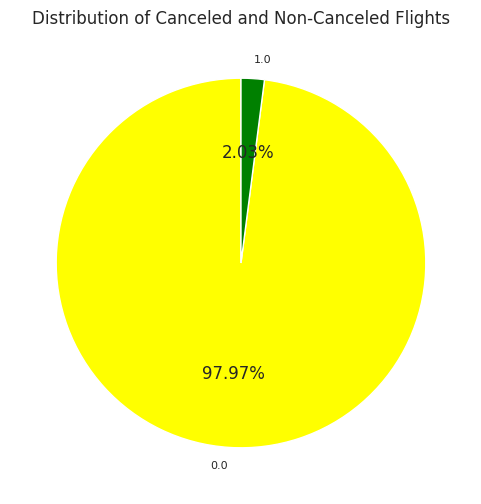

In [ ]:
#Distribution of cancelled and non-cancelled flights
cancel_counts = data['CANCELLED'].value_counts()

# Calculate the percentage of each cancellation status
cancel_percentage = cancel_counts / cancel_counts.sum() * 100

# Create a pie chart
colors = ['yellow', 'green']
plt.figure(figsize=(6, 6))
plt.pie(cancel_percentage, labels=cancel_percentage.index, autopct='%1.2f%%', colors=colors, startangle=90)
plt.title('Distribution of Canceled and Non-Canceled Flights')
plt.show()


<ipython-input-24-14ea2915ad2f>:7: FutureWarning: The operation <function mean at 0x7c63a1f3c670> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.
  group = data.groupby([pred], as_index=False).aggregate(np.mean)[[pred, 'CANCELLED']]


<Figure size 1500x500 with 0 Axes>

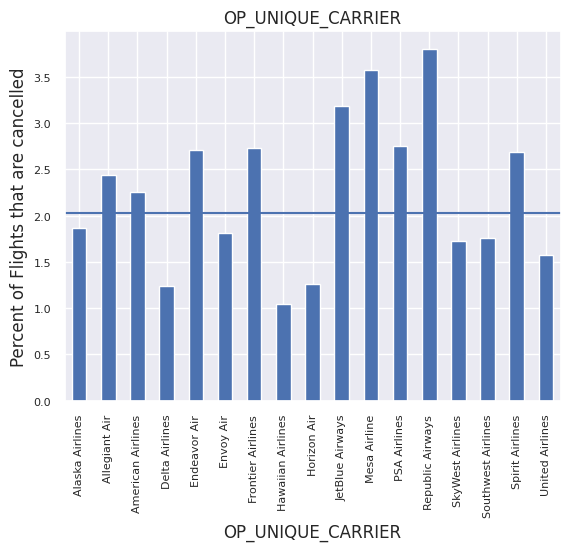

In [ ]:
# Proportion of cancelled flights per category

avgCancelled = np.sum(data['CANCELLED']) / len(data['CANCELLED'])
attributes = ['OP_UNIQUE_CARRIER']
for i, pred in enumerate(attributes):
    plt.figure(i, figsize=(15, 5))
    group = data.groupby([pred], as_index=False).aggregate(np.mean)[[pred, 'CANCELLED']]
    group.sort_values(by=pred, inplace=True)

    # Convert the CANCELLED column to percentage
    group['CANCELLED'] *= 100

    group.plot.bar(x=pred, y='CANCELLED')
    plt.axhline(y=avgCancelled * 100, label='Average')
    plt.ylabel('Percent of Flights that are cancelled')
    plt.title(pred)
    plt.legend().remove()


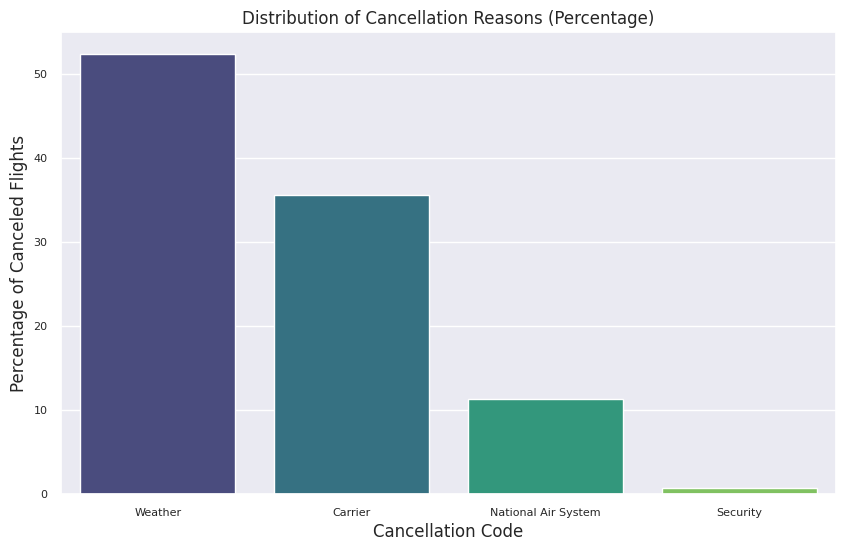

In [ ]:
# Distribution of cancellation reasons
data['CANCELLATION_CODE'].replace({
    'A': 'Carrier',
    'B': 'Weather',
    'C': 'National Air System',
    'D': 'Security'
}, inplace=True)

cancellation_counts = data['CANCELLATION_CODE'].value_counts()

# Calculate percentages
cancellation_percentages = (cancellation_counts / cancellation_counts.sum()) * 100

# Create a bar plot with percentages
plt.figure(figsize=(10, 6))
sns.barplot(x=cancellation_percentages.index, y=cancellation_percentages.values, palette="viridis")
plt.title('Distribution of Cancellation Reasons (Percentage)')
plt.xlabel('Cancellation Code')
plt.ylabel('Percentage of Canceled Flights')
plt.show()


CLASSIFICATION MODELS FOR DELAY DATA

In [ ]:
#keeping required columns for the classification models
cols = ["YEAR",
          "MONTH",
          "ORIGIN",
          "DEST",
          "CRS_DEP_TIME",
          "DEP_TIME",
          "DEP_DELAY",
          "DEP_DELAY_NEW",
          "CRS_ARR_TIME",
          "ARR_DEL15"]
model_data = df[cols].copy()

In [ ]:
#checking count of null values in each column
print(model_data.isnull().sum())

YEAR                  0
MONTH                 1
ORIGIN                3
DEST                  3
CRS_DEP_TIME          3
DEP_TIME         139429
DEP_DELAY        139497
DEP_DELAY_NEW    139497
CRS_ARR_TIME          6
ARR_DEL15        160475
dtype: int64


In [ ]:
#dropping the rows where any of the columns contain null values
model_data = model_data.dropna()

In [ ]:
del df
del delay_reason_data
del data

In [ ]:
#checking null value count again
print(model_data.isnull().sum())

YEAR             0
MONTH            0
ORIGIN           0
DEST             0
CRS_DEP_TIME     0
DEP_TIME         0
DEP_DELAY        0
DEP_DELAY_NEW    0
CRS_ARR_TIME     0
ARR_DEL15        0
dtype: int64


In [ ]:
#convert the categorical columns to numeric columns
labelEncoder = LabelEncoder()
model_data["ORIGIN"] = labelEncoder.fit_transform(model_data["ORIGIN"])
model_data["DEST"] = labelEncoder.fit_transform(model_data["DEST"])

In [ ]:
#check the first few rows again after transformation
model_data.head()

,YEAR,MONTH,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,CRS_ARR_TIME,ARR_DEL15
0,2022,1.0,105,294,930.0,925.0,-5.0,0.0,1123.0,0.0
1,2022,1.0,22,162,1620.0,1700.0,40.0,40.0,1827.0,1.0
2,2022,1.0,162,22,1913.0,1939.0,26.0,26.0,2142.0,1.0
3,2022,1.0,184,241,1220.0,1213.0,-7.0,0.0,1417.0,0.0
4,2022,1.0,364,22,630.0,625.0,-5.0,0.0,843.0,0.0


In [ ]:
#Splitting dataset into features and labels

features = model_data.drop("ARR_DEL15", axis=1)
labels = np.asarray(model_data["ARR_DEL15"])

In [ ]:
#splitting the data into test and train
X_train,X_test,Y_train,Y_test=train_test_split(features,labels,test_size=0.33,random_state=42)

In [ ]:
# DECISION TREE

classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, Y_train)
dt_y_pred = classifier.predict(X_test)
dt_accuracy = accuracy_score(Y_test, dt_y_pred)
accuracy = metrics.accuracy_score(Y_test, dt_y_pred)
precision = metrics.precision_score(Y_test, dt_y_pred)
recall = metrics.recall_score(Y_test, dt_y_pred)
f1_score = metrics.f1_score(Y_test, dt_y_pred)
print('DECISION TREE')
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1_score:.4f}")


DECISION TREE
Accuracy: 0.8843
Precision: 0.7336
Recall: 0.7283
F1 Score: 0.7310


In [ ]:
# LOGISTIC REGRESSION MODEL

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a logistic regression model
logreg_model = LogisticRegression(random_state=42)

# Train the model
logreg_model.fit(X_train_scaled, Y_train)

# Make predictions on the test set
predictions = logreg_model.predict(X_test_scaled)

# Evaluate the model
accuracy = metrics.accuracy_score(Y_test, predictions)
precision = metrics.precision_score(Y_test, predictions)
recall = metrics.recall_score(Y_test, predictions)
f1_score = metrics.f1_score(Y_test, predictions)

# Display the evaluation metrics
print('LOGISTIC REGRESSION MODEL')
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1_score:.4f}")



LOGISTIC REGRESSION MODEL
Accuracy: 0.9244
Precision: 0.8983
Recall: 0.7328
F1 Score: 0.8071


In [ ]:
#NAIVE BAYES

# Create a Gaussian Naive Bayes classifier
model = GaussianNB()

# Fit the model to the training data
model.fit(X_train, Y_train)

# Make predictions on the test data
model_pred = model.predict(X_test)

# Evaluate the model
accuracy = metrics.accuracy_score(Y_test, model_pred)
precision = metrics.precision_score(Y_test, model_pred)
recall = metrics.recall_score(Y_test, model_pred)
f1_score = metrics.f1_score(Y_test, model_pred)

print('NAIVE BAYES MODEL')
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1_score:.4f}")


NAIVE BAYES MODEL
Accuracy: 0.9210
Precision: 0.8529
Recall: 0.7661
F1 Score: 0.8072


In [ ]:
#RANDOM FOREST

# Filter data from January 2022 to February 2022
selected_start_month = 1
selected_end_month = 2
selected_year=2022
selected_data = model_data[(model_data['MONTH'] >= selected_start_month) & (model_data['MONTH'] <= selected_end_month) & (model_data['YEAR'] == selected_year)]

# Split the dataset into features and labels
features_selected = selected_data.drop("ARR_DEL15", axis=1)
labels_selected = np.asarray(selected_data["ARR_DEL15"])

# Split the data into training and testing sets
X_train_selected, X_test_selected, Y_train_selected, Y_test_selected = train_test_split(features_selected, labels_selected, test_size=0.33, random_state=42)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model
rf_classifier.fit(X_train_selected, Y_train_selected)

# Make predictions on the test set
rf_predictions = rf_classifier.predict(X_test_selected)

# Evaluate the model
rf_accuracy = metrics.accuracy_score(Y_test_selected, rf_predictions)
rf_precision = metrics.precision_score(Y_test_selected, rf_predictions)
rf_recall = metrics.recall_score(Y_test_selected, rf_predictions)
rf_f1_score = metrics.f1_score(Y_test_selected, rf_predictions)

# Display the evaluation metrics
print('RANDOM FOREST MODEL (considered only January 2022 and February 2022 data)')
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall: {rf_recall:.4f}")
print(f"F1 Score: {rf_f1_score:.4f}")


RANDOM FOREST MODEL (considered only January 2022 and February 2022 data)
Accuracy: 0.9215
Precision: 0.8542
Recall: 0.7207
F1 Score: 0.7818


In [ ]:
#Bagging


# Decision Tree Bagging Model
classifier = DecisionTreeClassifier(random_state=42)
bagging_classifier_dt = BaggingClassifier(base_estimator=classifier, n_estimators=10, random_state=42)

bagging_classifier_dt.fit(X_train, Y_train)
dt_y_pred = bagging_classifier_dt.predict(X_test)

dt_accuracy = accuracy_score(Y_test, dt_y_pred)
precision = metrics.precision_score(Y_test, dt_y_pred)
recall = metrics.recall_score(Y_test, dt_y_pred)
f1_score = metrics.f1_score(Y_test, dt_y_pred)


# Evaluate the Decision Tree Bagging model

print('DECISION TREE BAGGING MODEL')
print(f"Accuracy: {dt_accuracy}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1_score:.4f}")

# Logistic Regression Bagging Model
scaler = StandardScaler()
features_train_scaled = scaler.fit_transform(X_train)
features_test_scaled = scaler.transform(X_test)

logreg_model = LogisticRegression(random_state=42)
bagging_classifier_lr = BaggingClassifier(base_estimator=logreg_model, n_estimators=10, random_state=42)

bagging_classifier_lr.fit(features_train_scaled, Y_train)
lr_predictions = bagging_classifier_lr.predict(features_test_scaled)

# Evaluate the Logistic Regression Bagging model
accuracy = metrics.accuracy_score(Y_test, lr_predictions)
precision = metrics.precision_score(Y_test, lr_predictions)
recall = metrics.recall_score(Y_test, lr_predictions)
f1_score = metrics.f1_score(Y_test, lr_predictions)

# Display the evaluation metrics
print('LOGISTIC REGRESSION BAGGING MODEL')
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1_score:.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


DECISION TREE BAGGING MODEL
Accuracy: 0.9129624886181614
Precision: 0.8553
Recall: 0.7182
F1 Score: 0.7808


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


LOGISTIC REGRESSION BAGGING MODEL
Accuracy: 0.9244
Precision: 0.8984
Recall: 0.7327
F1 Score: 0.8071


In [ ]:
# Adaboost

# Define the base classifier
base_classifier = DecisionTreeClassifier(random_state=42)

# Number of base classifiers
n_classifiers = 50

# Create AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(base_classifier, n_estimators=n_classifiers, random_state=42)

# Train the AdaBoost classifier
adaboost_classifier.fit(X_train, Y_train)

# Predict using the AdaBoost classifier
adaboost_y_pred = adaboost_classifier.predict(X_test)

# Calculate accuracy
adaboost_accuracy = accuracy_score(Y_test, adaboost_y_pred)
print(f"AdaBoost Accuracy: {adaboost_accuracy}")

# Additional metrics
accuracy = accuracy_score(Y_test, adaboost_y_pred)
precision = precision_score(Y_test, adaboost_y_pred)
recall = recall_score(Y_test, adaboost_y_pred)
f1 = f1_score(Y_test, adaboost_y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

AdaBoost Accuracy: 0.8824240728297312
Accuracy: 0.8824
Precision: 0.7349
Recall: 0.7120
F1 Score: 0.7233
